# Image Recongnition Case with NN
Refrence List
- [Deep Neural Network Keras Way](https://www.kaggle.com/poonaml/deep-neural-network-keras-way)
- [Optimizing Neural Networks using Keras](https://www.analyticsvidhya.com/blog/2016/10/tutorial-optimizing-neural-networks-using-keras-with-image-recognition-case-study/)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
path=r"F:\Diverse\statistics\Python_data_analysis\Kaggle项目\20170926_MNIST\dataset"
os.chdir(path)
#os.environ["KERAS_BACKEND"] = "tensorflow"
% matplotlib inline

### 1.Loading data

In [2]:
train = pd.read_csv("train.csv")
print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
test = pd.read_csv("test.csv")

To reduce training time, I just pick up 5000 example for fitting my model.

In [4]:
X_train = train.iloc[:,1:].values.astype("float32")[:5000]
y_train = train.iloc[:,0].values.astype("int32")[:5000]
X_test = test.values.astype("float32")

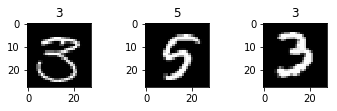

In [5]:
X_train = X_train.reshape(X_train.shape[0], 28, 28)
for i in range(7,10):
    plt.subplot(330+i)
    plt.imshow(X_train[i],cmap="gray")
    plt.title(y_train[i])


In [6]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

### 2.preprocessing the digit image

In [7]:
#Feature Standardization
mean_px = X_train.mean()
std_px = X_train.std()

def standardlize(x):
    return (x-mean_px)/std_px

In [8]:
#One_hot encoding of labels
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train)
y_train.shape

Using TensorFlow backend.


(5000, 10)

In [9]:
y_train[0]

array([ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

### 3.Designing Neural Network Architecture

In [10]:
#set seed values
np.random.seed(43)

In [11]:
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers.core import Lambda, Flatten, Dense, Dropout
from keras.layers import BatchNormalization, Convolution2D, MaxPool2D

Lets create a simple model from Keras Sequential layer.
1. **Lambda layer** performs simple arithmetic operations like sum, average, exponentiation etc.
In 1st layer of the model we have to define input dimensions of our data in (rows,columns,colour channel) format. (In theano colour channel comes first)
2. **Flatten** will transform input into 1D array.
3. **Dense** is fully connected layer that means all neurons in previous layers will be connected to all neurons in fully connected layer. In the last layer we have to specify output dimensions/classes of the model. Here it's 10, since we have to output 10 different digit labels.

In [12]:
#Linear Model
model = Sequential()
model.add(Lambda(standardlize, input_shape=(28,28,1)))
model.add(Flatten())
model.add(Dense(10, activation="softmax"))
print("input shape", model.input_shape)
print("output_shape", model.output_shape)

input shape (None, 28, 28, 1)
output_shape (None, 10)


Before making network ready for training we have to make sure to add below things:
1. **A loss function**: to measure how good the network is
2. **An optimizer**: to update network as it sees more data and reduce loss value
3. **Metrics**: to monitor performance of network

In [13]:
#Complie network
from keras.optimizers import RMSprop
model.compile(optimizer = RMSprop(lr=0.001),
             loss="categorical_crossentropy",
             metrics=["accuracy"])

In [14]:
#defines variates
epochs = 5
batch_size = 32

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,random_state=42)

log=model.fit(X_train,y_train,batch_size=batch_size, epochs=epochs,validation_data=(X_val, y_val))

Train on 3750 samples, validate on 1250 samples
Epoch 1/5
3750/3750 [==============================] - 1s - loss: 0.8479 - acc: 0.7320 - val_loss: 0.5279 - val_acc: 0.8544
Epoch 2/5
3750/3750 [==============================] - 0s - loss: 0.4066 - acc: 0.8819 - val_loss: 0.4714 - val_acc: 0.8696

In [16]:
#model.fit reutrn a object called "History",which is a record of all computational metrics at successive epochs
log.history["loss"]

[0.84790519562562305,
 0.40657627278963726,
 0.33233632221221926,
 0.29425360228617986,
 0.26888836523691811]

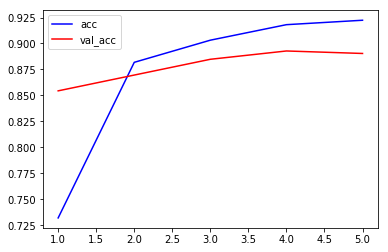

In [17]:
plt.plot(range(1,epochs+1),log.history["acc"],"b",label="acc")
plt.plot(range(1,epochs+1),log.history["val_acc"],"r",label="val_acc")
plt.legend()

### 4.Model evaluation

In [18]:
X_test[0].shape

(28, 28, 1)

In [19]:
pred = model.predict_classes(X_test, verbose=0)

In [20]:
def show_pred(index=None,pred=pred):
    img=X_test[index].reshape(28,28)
    plt.imshow(img, cmap="gray")
    plt.axis("off")
    plt.title("prediction_result: "+str(pred[index]))
    plt.show()

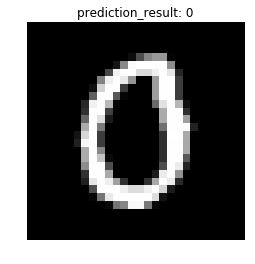

In [21]:
show_pred(index=100)

### 5. Hyperparameters to search

Some **important parameters** for optimizing neural network:
- Type of architecture
- Number of Layers
- Number of Neurons in a layer
- Regularization parameters
- Learning rate
- Type of optimization / backpropagation technique to use
- Dropout
- Weight sharing

The best way to pick good parameters is to understand your problem domain. Research the previously applied techniques on your data, and most importantly  ask experienced people for insights to the problem. It’s the only way you can try to ensure you get a “good enough” neural network model.

### 6."Wide" Model building

- lets model to be "wide",i.e increase the number of neurons in hidden layer

In [22]:
#define vars
hidden_num_units = 500
epochs = 5
batch_size = 32

In [23]:
#“Wide" Model
model = Sequential()
model.add(Lambda(standardlize, input_shape=(28,28,1)))
model.add(Flatten())
model.add(Dense(hidden_num_units,activation="relu"))
model.add(Dense(10,activation="softmax"))
print("input shape", model.input_shape)
print("output_shape", model.output_shape)

input shape (None, 28, 28, 1)
output_shape (None, 10)


In [24]:
model.compile(optimizer = RMSprop(lr=0.001),
             loss="categorical_crossentropy",
             metrics=["accuracy"])

log=model.fit(X_train,y_train,batch_size=batch_size, 
              epochs=epochs,validation_data=(X_val, y_val))

Train on 3750 samples, validate on 1250 samples
Epoch 1/5
3750/3750 [==============================] - 4s - loss: 0.5830 - acc: 0.8237 - val_loss: 0.4465 - val_acc: 0.8720

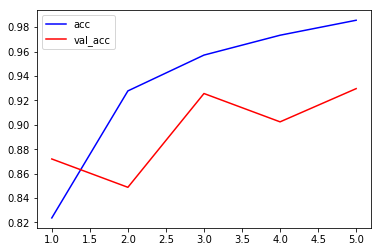

In [25]:
plt.plot(range(1,epochs+1),log.history["acc"],"b",label="acc")
plt.plot(range(1,epochs+1),log.history["val_acc"],"r",label="val_acc")
plt.legend()

In [26]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_2 (Lambda)            (None, 28, 28, 1)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 500)               392500    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5010      
Total params: 397,510
Trainable params: 397,510
Non-trainable params: 0
_________________________________________________________________


### 7."Deep" Model building

- We see that this model performs significantly overfitting at 4 epochs!Now instead of "wide".we can try making model "deep",i.e we add some layers in this model

In [27]:
#define variates
hidden1_num_units = 50
hidden2_num_units = 50
hidden3_num_units = 50
hidden4_num_units = 50
hidden5_num_units = 50 

epochs = 5
batch_size = 32

In [28]:
#“Deep" Model
model = Sequential()
model.add(Lambda(standardlize, input_shape=(28,28,1)))
model.add(Flatten())
model.add(Dense(hidden1_num_units, activation="relu"))
model.add(Dense(hidden2_num_units, activation="relu"))
model.add(Dense(hidden3_num_units, activation="relu"))
model.add(Dense(hidden4_num_units, activation="relu"))
model.add(Dense(hidden5_num_units, activation="relu"))
model.add(Dense(10,activation="softmax"))
print("input shape", model.input_shape)
print("output_shape", model.output_shape)

input shape (None, 28, 28, 1)
output_shape (None, 10)


In [29]:
model.compile(optimizer = RMSprop(lr=0.001),
              loss="categorical_crossentropy",
              metrics=["accuracy"])

log=model.fit(X_train,y_train,batch_size=batch_size,
             epochs=epochs,validation_data=(X_val,y_val))

Train on 3750 samples, validate on 1250 samples
Epoch 1/5
3750/3750 [==============================] - 2s - loss: 0.9008 - acc: 0.7123 - val_loss: 0.5656 - val_acc: 0.8160 - ETA: 0s - loss: 1.0947 - acc: 0.6513

In [30]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_3 (Lambda)            (None, 28, 28, 1)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_5 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_6 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_7 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_8 (Dense)              (None, 50)                2550      
__________

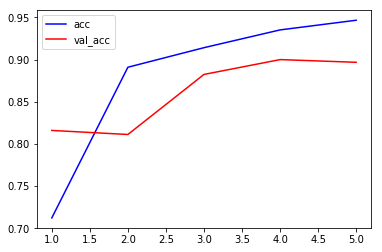

In [31]:
plt.plot(range(1,epochs+1),log.history["acc"],"b",label="acc")
plt.plot(range(1,epochs+1),log.history["val_acc"],"r",label="val_acc")
plt.legend()

- Obviously, "Deep" model performs better than "Wide" model.However, this model also looks like overfitting.Now we add dropout to reduce the overfitting!

### 7. "Dropout" Model

In [32]:
#define variates
hidden1_num_units = 50
hidden2_num_units = 50
hidden3_num_units = 50
hidden4_num_units = 50
hidden5_num_units = 50 

epochs = 5
batch_size = 32
dropout_ratio = 0.2


In [33]:
#“Deep" Model
model = Sequential()
model.add(Lambda(standardlize, input_shape=(28,28,1)))
model.add(Flatten())
model.add(Dense(hidden1_num_units, activation="relu"))
model.add(Dropout(dropout_ratio))
model.add(Dense(hidden2_num_units, activation="relu"))
model.add(Dropout(dropout_ratio))
model.add(Dense(hidden3_num_units, activation="relu"))
model.add(Dropout(dropout_ratio))
model.add(Dense(hidden4_num_units, activation="relu"))
model.add(Dropout(dropout_ratio))
model.add(Dense(hidden5_num_units, activation="relu"))
model.add(Dropout(dropout_ratio))
model.add(Dense(10,activation="softmax"))
print("input shape", model.input_shape)
print("output_shape", model.output_shape)

input shape (None, 28, 28, 1)
output_shape (None, 10)


In [34]:
model.compile(optimizer = RMSprop(lr=0.001),
              loss="categorical_crossentropy",
              metrics=["accuracy"])

log=model.fit(X_train,y_train,batch_size=batch_size,
             epochs=epochs,validation_data=(X_val,y_val))

Train on 3750 samples, validate on 1250 samples
Epoch 1/5
3750/3750 [==============================] - 3s - loss: 1.8635 - acc: 0.3421 - val_loss: 1.0707 - val_acc: 0.6688

In [35]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_4 (Lambda)            (None, 28, 28, 1)         0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 50)                39250     
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 50)                2550      
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 50)                2550      
__________

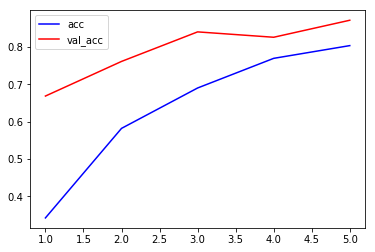

In [36]:
plt.plot(range(1,epochs+1),log.history["acc"],"b",label="acc")
plt.plot(range(1,epochs+1),log.history["val_acc"],"r",label="val_acc")
plt.legend()

- the dev set preforms better than train set. Perhaps, the data of dev set is eaiser to recongnize than train data.On other hand, we can call _"data mismatch"_

### 8.Train model to full potential

- we are not training our model to its full potential. Increase our training epochs to 20 and check it out!

In [37]:
#define variates
epochs = 20

In [38]:
#“Deep" Model
model = Sequential()
model.add(Lambda(standardlize, input_shape=(28,28,1)))
model.add(Flatten())
model.add(Dense(hidden1_num_units, activation="relu"))
model.add(Dropout(dropout_ratio))
model.add(Dense(hidden2_num_units, activation="relu"))
model.add(Dropout(dropout_ratio))
model.add(Dense(hidden3_num_units, activation="relu"))
model.add(Dropout(dropout_ratio))
model.add(Dense(hidden4_num_units, activation="relu"))
model.add(Dropout(dropout_ratio))
model.add(Dense(hidden5_num_units, activation="relu"))
model.add(Dropout(dropout_ratio))
model.add(Dense(10,activation="softmax"))
print("input shape", model.input_shape)
print("output_shape", model.output_shape)

input shape (None, 28, 28, 1)
output_shape (None, 10)


In [39]:
model.compile(optimizer = RMSprop(lr=0.001),
              loss="categorical_crossentropy",
              metrics=["accuracy"])

log=model.fit(X_train,y_train,batch_size=batch_size,verbose=0,
             epochs=epochs,validation_data=(X_val,y_val))

In [40]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_5 (Lambda)            (None, 28, 28, 1)         0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 50)                39250     
_________________________________________________________________
dropout_6 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 50)                2550      
_________________________________________________________________
dropout_7 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 50)                2550      
__________

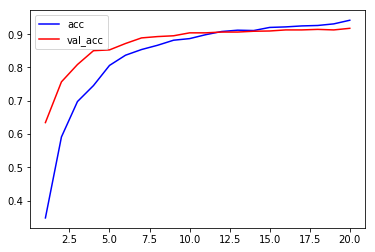

In [41]:
plt.plot(range(1,epochs+1),log.history["acc"],"b",label="acc")
plt.plot(range(1,epochs+1),log.history["val_acc"],"r",label="val_acc")
plt.legend()

**prefect at 10 epoch!**

### 9.predict results

In [42]:
predictions = model.predict_classes(X_test, verbose=0)
submissions = pd.DataFrame({"ImageId":list(range(1,len(predictions)+1)),
                           "Label":predictions})
submissions.to_csv("DR.csv", index=False, header=True)